# Análisis de métricas de los algoritmos

In [5]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.generateData import generate_data 
from algorithms.pso import run_pso 
from algorithms.ga import run_ga

In [6]:
def run_tests(test_sizes):
    results = {
        "test_size": [],
        "algorithm": [],
        "execution_time": [],
        "mean_cost": [],
        "std_dev": []
    }
    
    for size in test_sizes:
        # Generar datos
        filename = "test"
        generate_data(num_lines=size, min_nodes=3, max_nodes=10, filename=filename)  # Genera un CSV para cada tamaño de prueba
        print(f"Datos generados para tamaño de muestra: {size}")
        
        # Ejecutar PSO y medir tiempo
        start_time = time.time()
        pso_results, pso_mean, pso_std = run_pso(filename)
        pso_execution_time = time.time() - start_time
        print(f"PSO ejecutado en {pso_execution_time:.2f} segundos para tamaño de muestra: {size}")
        
        # Guardar resultados de PSO
        results["test_size"].append(size)
        results["algorithm"].append("PSO")
        results["execution_time"].append(pso_execution_time)
        results["mean_cost"].append(pso_mean)
        results["std_dev"].append(pso_std)
        
        # Ejecutar GA y medir tiempo
        start_time = time.time()
        ga_results, ga_mean, ga_std = run_ga(filename)
        ga_execution_time = time.time() - start_time
        print(f"GA ejecutado en {ga_execution_time:.2f} segundos para tamaño de muestra: {size}")
        
        # Guardar resultados de GA
        results["test_size"].append(size)
        results["algorithm"].append("GA")
        results["execution_time"].append(ga_execution_time)
        results["mean_cost"].append(ga_mean)
        results["std_dev"].append(ga_std)
    
    # Convertir los resultados a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

In [7]:
#Función para graficar los resultados
def plot_results(results_df):
    # Graficar el tiempo de ejecución para PSO y GA por separado
    for algo in ["PSO", "GA"]:
        subset = results_df[results_df["algorithm"] == algo]
        plt.figure(figsize=(12, 8))
        plt.scatter(subset["test_size"], subset["execution_time"], label=f"{algo} Execution Time", color='blue' if algo == "PSO" else 'red')
        plt.xlabel("Test Size")
        plt.ylabel("Execution Time (s)")
        plt.title(f"Execution Time by Test Size for {algo}")
        plt.legend()
        plt.show()


Datos generados para tamaño de muestra: 5
PSO ejecutado en 0.84 segundos para tamaño de muestra: 5
GA ejecutado en 1.44 segundos para tamaño de muestra: 5
Datos generados para tamaño de muestra: 10
PSO ejecutado en 0.93 segundos para tamaño de muestra: 10
GA ejecutado en 1.16 segundos para tamaño de muestra: 10
Datos generados para tamaño de muestra: 50
PSO ejecutado en 4.47 segundos para tamaño de muestra: 50
GA ejecutado en 8.62 segundos para tamaño de muestra: 50
Datos generados para tamaño de muestra: 100
PSO ejecutado en 12.64 segundos para tamaño de muestra: 100
GA ejecutado en 16.03 segundos para tamaño de muestra: 100
Datos generados para tamaño de muestra: 500
PSO ejecutado en 42.27 segundos para tamaño de muestra: 500
GA ejecutado en 86.31 segundos para tamaño de muestra: 500
Datos generados para tamaño de muestra: 1000
PSO ejecutado en 96.52 segundos para tamaño de muestra: 1000
GA ejecutado en 130.13 segundos para tamaño de muestra: 1000
Datos generados para tamaño de muest

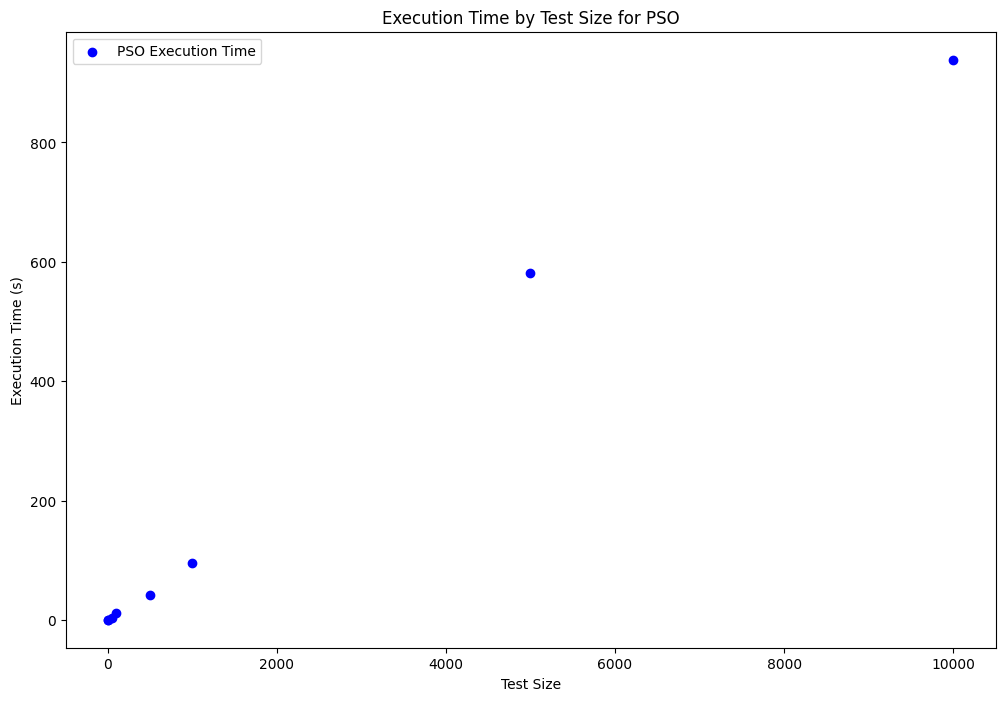

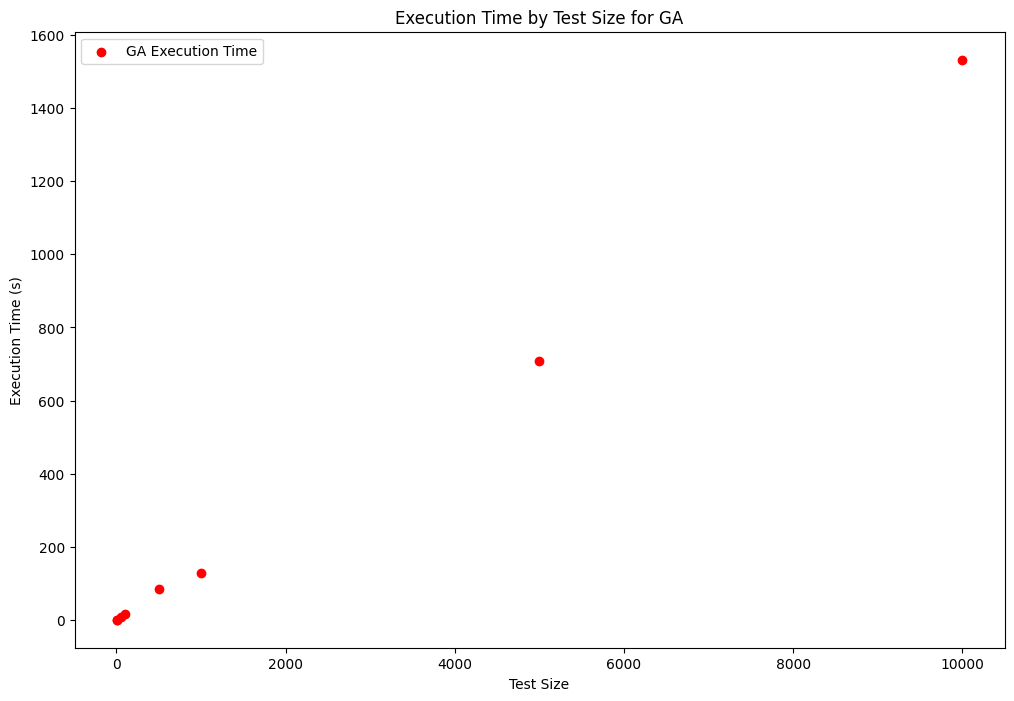

In [8]:
test_sizes = [5, 10, 50, 100, 500, 1000, 5000, 10000]
results_df = run_tests(test_sizes)
plot_results(results_df)

# 